In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Universidad/NLP/Proyecto Final/Bases de datos/train.csv')
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Arreglando problemas de equilibrio

In [ ]:
# Crear la columna is_toxic (1 si alguna de las etiquetas es tóxica, 0 si ninguna lo es)
df['is_toxic'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)
df.drop(columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], inplace=True)
df.head(5)

,id,comment_text,is_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
df['is_toxic'].value_counts()

,count
is_toxic,
0,143346
1,16225


In [ ]:
df.to_csv('mi_dataframe.csv', index=False)


In [ ]:

# Dividir las características (X) y la etiqueta binaria (y)
X = df['comment_text']
y = df['is_toxic']
y.value_counts()

,count
is_toxic,
0,143346
1,16225


In [ ]:
# Vectorizar el texto con TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(X)

# Submuestreo para la clase no tóxica
rus = RandomUnderSampler(sampling_strategy=0.3, random_state=42)  # Ajustar el valor según el balance deseado
X_resampled, y_resampled = rus.fit_resample(X_vec, y)

# Sobremuestreo para la clase tóxica
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_resampled, y_resampled)

In [ ]:
y_balanced.value_counts()

,count
is_toxic,
0,54083
1,54083


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

# Cargar el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Separar en conjunto de entrenamiento y prueba
train_texts, val_texts, train_labels, val_labels = train_test_split(X_balanced, y_balanced, test_size=0.2)

# Tokenización
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# Convertir a tensores de
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_encodings = {key: torch.tensor(val) for key, val in train_encodings.items()}
val_encodings = {key: torch.tensor(val) for key, val in val_encodings.items()}

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

## viejo

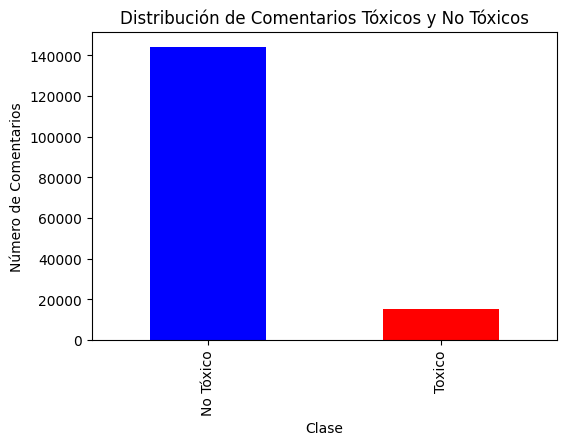

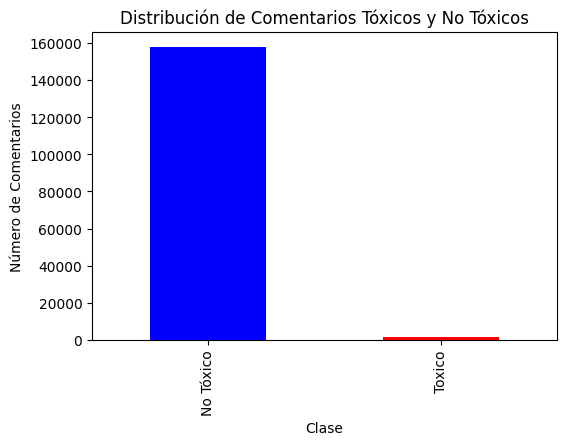

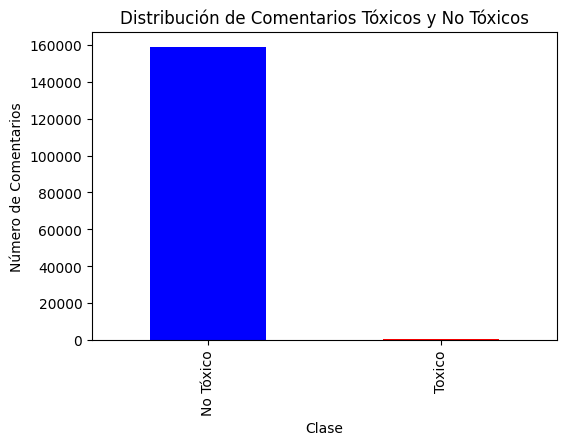

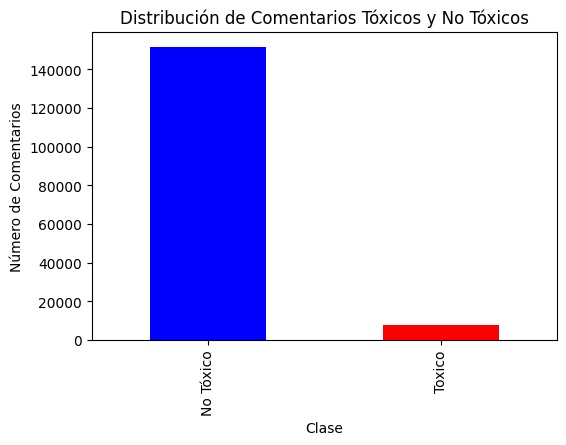

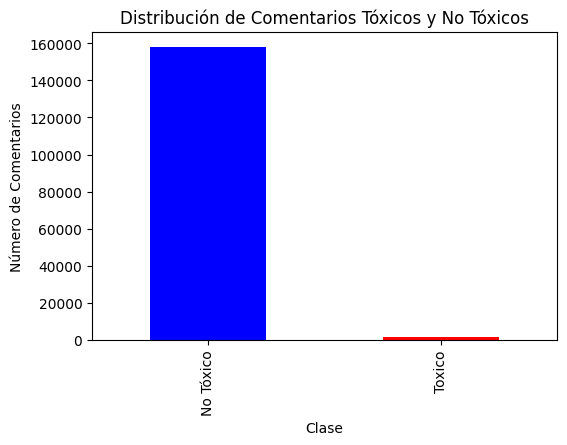

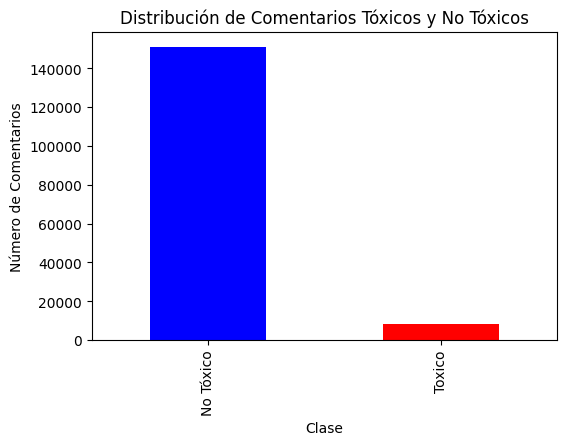

In [ ]:
plt.figure(figsize=(6,4))
class_counts1.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Comentarios Tóxicos y No Tóxicos')
plt.xlabel('Clase')
plt.ylabel('Número de Comentarios')
plt.xticks(ticks=[0, 1], labels=['No Tóxico', 'Toxico'])
plt.show()

plt.figure(figsize=(6,4))
class_counts2.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Comentarios Tóxicos y No Tóxicos')
plt.xlabel('Clase')
plt.ylabel('Número de Comentarios')
plt.xticks(ticks=[0, 1], labels=['No Tóxico', 'Toxico'])
plt.show()

plt.figure(figsize=(6,4))
class_counts3.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Comentarios Tóxicos y No Tóxicos')
plt.xlabel('Clase')
plt.ylabel('Número de Comentarios')
plt.xticks(ticks=[0, 1], labels=['No Tóxico', 'Toxico'])
plt.show()

plt.figure(figsize=(6,4))
class_counts4.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Comentarios Tóxicos y No Tóxicos')
plt.xlabel('Clase')
plt.ylabel('Número de Comentarios')
plt.xticks(ticks=[0, 1], labels=['No Tóxico', 'Toxico'])
plt.show()

plt.figure(figsize=(6,4))
class_counts5.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Comentarios Tóxicos y No Tóxicos')
plt.xlabel('Clase')
plt.ylabel('Número de Comentarios')
plt.xticks(ticks=[0, 1], labels=['No Tóxico', 'Toxico'])
plt.show()

plt.figure(figsize=(6,4))
class_counts6.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Comentarios Tóxicos y No Tóxicos')
plt.xlabel('Clase')
plt.ylabel('Número de Comentarios')
plt.xticks(ticks=[0, 1], labels=['No Tóxico', 'Toxico'])
plt.show()